# Conditional Worklfow in LangGraph

### Solving Quadratric Equation to understand Conditional Flow

In [14]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [15]:
# Building the Struct of the Quadratic 

class QuadState(TypedDict):

    a : int
    b : int
    c : int

    equation : str
    determinant : float
    
    root_1 : float
    root_2 : float
    answer : str

### Creating the graphs 

```
input (a, b, c) -> show equation -> calculate determitant -> based on determitant check if it will have root or not -> will figure out root
```

In [16]:
# Defining the show_equation function

def show_equation_func(state: QuadState):

    a = state['a']
    b = state['b']
    c = state['c']
    
    # Based on the values of a, b, c - let's create quadratic equation
    equation = f"{a}x² + {b}x + {c}"

    # Updating the QuadState
    state['equation'] = equation

    return { "equation" : equation }
    

In [17]:
# Defining the calculate_determitant_func function

def calculate_determinant_func(state : QuadState):

    # Reterieving the values of coefficients
    a = state['a']
    b = state['b']
    c = state['c']

    # Calculating the determitant
    determinant = b*b - 4*a*c

    # Saving the values to QuadState determitant values
    state['determinant'] = determinant

    return { "determinant" : determinant }

In [27]:
# Defining the show_no_real_roots_func function

def no_real_roots_func(state: QuadState):

    answer = "No Real Roots"
    state['answer'] = answer

    return { "answer" : answer }

In [38]:
# Defining the calculate_real_roots_node function

def real_roots_func(state: QuadState):

    # Retrieving the determitant
    determinant = state['determinant']

    # Reterieving the values of coefficients
    a = state['a']
    b = state['b']
    
    # Calculating the roots
    root_1 = ((-1*b) + determinant**0.05)/(2*a)
    root_2 = ((-1*b) - determinant**0.05)/(2*a)

    # Saving the values to GraphState
    state["root_1"] = root_1
    state["root_2"] = root_2    

    return { "root_1" : root_1, "root_2" : root_2 }

In [55]:
# Defining the calculate_repeated_roots_node function

def repeated_roots_func(state: QuadState):

    # Reterieving the values of coefficients
    a = state['a']
    b = state['b'] 

    # Calculating the roots
    root_1 = (-1*b)/(2*a)
    root_2 = root_1

    # Saving the values to GraphState
    state["root_1"] = root_1
    state["root_2"] = root_2    

    return { "root_1" : root_1, "root_2" : root_2 }

In [56]:
# Defining the final_answer_node function

def final_answer_func(state: QuadState):

    determinant = state['determinant']

    if determinant < 0:
        answer = "No Real Roots"
    elif determinant > 0 :
        answer = "Have Two Distinct Real Roots"
    else :
        answer = "Have Two Same Real Roots"

    state['answer'] = answer

    return { "answer" : answer }

In [57]:
# Defining the check_condition function

def check_condition_func(state: QuadState) -> Literal["real_roots_node", "no_real_roots_node", "repeated_roots_node"]:

    if state['determinant'] > 0 :
        return "real_roots_node"
    elif state['determinant'] < 0 :
        return "no_real_roots_node"
    else :
        return "repeated_roots_node"

In [58]:
# Creating an instance of StateGraph
quad_graph = StateGraph(QuadState)

# Adding Nodes
quad_graph.add_node("show_equation_node", show_equation_func)
quad_graph.add_node("determinant_node", calculate_determinant_func)
quad_graph.add_node("no_real_roots_node", no_real_roots_func)
quad_graph.add_node("real_roots_node", real_roots_func)
quad_graph.add_node("repeated_roots_node", repeated_roots_func)
quad_graph.add_node("final_answer_node", final_answer_func)


# Adding Edges
# Super Set 1
quad_graph.add_edge(START, "show_equation_node")
quad_graph.add_edge("show_equation_node","determinant_node")

# Super Set 2
quad_graph.add_conditional_edges("determinant_node",check_condition_func)

# Super Set 3
quad_graph.add_edge("no_real_roots_node", "final_answer_node" )
quad_graph.add_edge("real_roots_node", "final_answer_node")
quad_graph.add_edge("repeated_roots_node", "final_answer_node")

# Super Set 4
quad_graph.add_edge("final_answer_node", END)

# Compiling the Workflow
quad_workflow = quad_graph.compile()

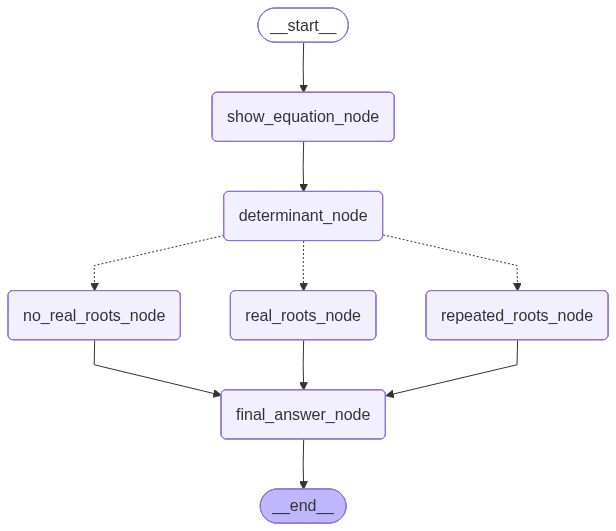

In [59]:
quad_workflow

In [60]:
initial_state = {
    "a" : 1,
    "b" : -4,
    "c" : 4
}

In [61]:
final_state = quad_workflow.invoke(initial_state)
final_state

{'a': 1,
 'b': -4,
 'c': 4,
 'equation': '1x² + -4x + 4',
 'determinant': 0,
 'root_1': 2.0,
 'root_2': 2.0,
 'answer': 'Have Two Same Real Roots'}